## The Constant Model



<div class="alert alert-block alert-info"><b>Instructor Note:</b> This notebook is intended to introduce students the R programming language. We'll explore a dataset that contains information about resteraunt bills and tips. The <code>tips</code> data set was created by Michael Waskom - the creator of the <code>seaborn python</code> data visualisation package. According to the <code>tips</code> dataset documentation, the <code>tips</code> dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics <a href = "https://sebastiansauer.github.io/data/tips-help.pdf">(Bryant & Smith 1995)</a>. The waiter collected several variables: The tip in dollars, the bill in dollars, the sex of the bill payer, whether there were smokers in the party, the day of the week, the time of day and the size of the party. 

**Note:** The variable tip percent was added for this activity.

<br>In this notebook, students will...
<li>Learn basic commands in the R programming language </li><li>Calculate summary statistics from a dataframe </li><li>Create various types of data visualizations</li></div>

In [2]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command downloads a useful package of R commands
library(coursekata)

In [1]:
### 1.0 - Exploring the dataset

<div class="alert alert-block alert-info"><b>Instructor Note:</b> Emphasize for students that the first step in any analysis is to explore the dataframe, familiarize yourself with the key variables, and look for inconsistencies. This section will introduce students to the R commands they need for these tasks.
</div>

To begin, let's load our data. Our full data set is included in a file named `tips.csv`. 

The <code>tips</code> data set was created by Michael Waskom - the creator of the <code>seaborn python</code> data visualisation package. According to the <code>tips</code> dataset documentation, the <code>tips</code> dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics <a href = "https://sebastiansauer.github.io/data/tips-help.pdf">(Bryant & Smith 1995)</a>. The waiter collected several variables: The tip in dollars, the bill in dollars, the sex of the bill payer, whether there were smokers in the party, the day of the week, the time of day and the size of the party. 

The command below loads the data from the file and stores it into an R dataframe object called `dat`.

In [1]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command reads the file 'tips.csv' and stores it in an object called `dat`
dat <- read.csv('data/tips.csv')

To get a quick view of the first 6 rows in the `dat` dataframe, we can use the `head` function. 

Functions in R work a lot  like functions in math. You enter the name of the function (in this case `head`), then you provide an input for the function to use (in this case our dataframe `dat`) and then you get the results of the command.

In [5]:
head(dat)

,total_bill,tip,tip_percent,smoker,day,time,size
,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,6,No,Sun,Dinner,2
2,10.34,1.66,16,No,Sun,Dinner,3
3,21.01,3.50,17,No,Sun,Dinner,3
4,23.68,3.31,14,No,Sun,Dinner,2
5,24.59,3.61,15,No,Sun,Dinner,4
6,25.29,4.71,19,No,Sun,Dinner,4


The vertical columns of the dataframe are called `variables`, and their elements are called `values`. For example, the variable `smoker` has values `Yes` or `No`. 

The horizontal rows of the dataframe are called `observations`. For example, the first observation is a customer that had a total bill of \$16.99 and left a tip amount of \$1.01 (which is about 6\%).

**Question 1.1 -** Of the variables displayed, identify one that is quantitative and one that is categorical.

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> Categorical -->  smoker | Quantitative --> toal_bill<br><br><b>Instructor Note:</b> Here's our delineation and reasoning for the first several variables. Helping students develop their ability to classify the variables will be helpful for the decisions they make later in the data analysis process.

- `total_bill` --> quantitative | Reasoning: it's numerical and describes the amount of the total bill
- `tip` --> quantitative | Reasoning: it's numerical and decribes the ampount of the tip
- `tip_percent` --> quantitative | Reasoning: it's numeric and describes the percent of the tip
- `smoker` --> categorical | Reasoning: it's a label that describes whether or not the customer smoked (Yes or No)
- `day` --> categorical | Reasoning: the day of the week (Thursday, Friday, Saturday, or Sunday)
- `time` --> categorical | Reasoning: the type of meal (Lunch or Dinner)
- `size` --> quantitative | Reasoning: it's numeric and describes the number of people in the group
</div>

The `head` command only displays several rows of the dataframe. To see the full dimensions of the dataframe, we can use the `dim` command.

**Question 1.2 -** Use the `dim` command on `dat` to display the dimensions of the dataframe.

In [6]:
# Sample response 
dim(dat)

[1] 244   7

The first number outputted by dim is the number of horizontal rows in the dataframe. This represents the number of observations (number of bills). The second number is the number of vertical columns in the dataframe. This represents the number of variables. What are all these variables? Here's a full description of each of them (as well as some background information on the data):

#### The Dataset
 Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

##### Variables
- `total_bill` - The amount of the total bill
- `tip` - The ampount of the tip
- `tip_percent` - The percent of the tip rounded to the nearest whole number
- `smoker` - Whether or not the customer smoked (Yes or No)
- `day` - The day of the week (Thursday, Friday, Saturday, or Sunday)
- `time` - The type of meal (Lunch or Dinner)
- `size` - The number of people in the group

We'll only work with only a few variables at a time. In the following code, we use the `select` command to select only the variables `total_bill`, `tip`, `tip_percent`, `day` and `time` and save them in a new dataframe called `example_dat`.

In [7]:
## Run this code by do not edit it
# Select certain columns from dat, store into example_dat
example_dat <- select(dat, total_bill, tip, tip_percent, day, time)

# Display head of example_dat
head(example_dat)

,total_bill,tip,tip_percent,day,time
,<dbl>,<dbl>,<int>,<chr>,<chr>
1,16.99,1.01,6,Sun,Dinner
2,10.34,1.66,16,Sun,Dinner
3,21.01,3.50,17,Sun,Dinner
4,23.68,3.31,14,Sun,Dinner
5,24.59,3.61,15,Sun,Dinner
6,25.29,4.71,19,Sun,Dinner


<div class="alert alert-block alert-info"><b>Instructor Note:</b> The <code>select</code> command is one of several functions in this notebook that come from a popular R package called <code>dplyr</code>. Because R is an open-source coding language, researchers and third-parties create their own packages of useful functions and share them freely online. The <code>coursekata</code> library, which we downloaded at the beginning of the notebook with the command <code>library(coursekata)</code>, compiles a bunch of the most popular packages together (including <code>dplyr</code>). To make sure you have all the most useful R functions at your disposal, we recommend using the <code>coursekata</code> library for all your projects.
</div>

**Question 1.3 -** Use the `select` command on to select the variables `total_bill`, `tip_percent`, `day` and `time` from `dat`. Store your new dataframe in an object called `my_dat` and display its head.

In [8]:
## Sample response
# Select certain columns from dat, store into my_dat
my_dat <- select(dat, total_bill, tip_percent, day, time)

# Display head of my_dat
head(my_dat)

,total_bill,tip_percent,day,time
,<dbl>,<int>,<chr>,<chr>
1,16.99,6,Sun,Dinner
2,10.34,16,Sun,Dinner
3,21.01,17,Sun,Dinner
4,23.68,14,Sun,Dinner
5,24.59,15,Sun,Dinner
6,25.29,19,Sun,Dinner


In addition to filtering out columns (variables), we can also filter out rows (observations). For example, if I only wanted to analyze receipts for lunches that have an total bill lower than 20 dollars, and occurred on Friday, I can use the `subset` command on `example_dat` like this:

In [9]:
## Run this code but do not edit it
# Subset example_dat to only lunches that have a total bill of less than 20 dollars
subset(example_dat, time == "Lunch" & total_bill < 20 & day == "Fri")

,total_bill,tip,tip_percent,day,time
,<dbl>,<dbl>,<int>,<chr>,<chr>
221,12.16,2.20,18,Fri,Lunch
222,13.42,3.48,26,Fri,Lunch
223,8.58,1.92,22,Fri,Lunch
224,15.98,3.00,19,Fri,Lunch
225,13.42,1.58,12,Fri,Lunch
226,16.27,2.50,15,Fri,Lunch
227,10.09,2.00,20,Fri,Lunch


A total of seven observations fit these conditions.

Note that R has different conventions for comparative statements. For example...
- `==` means `equals exactly`
- `!=` means `does not equal`
- `<` means `less than`
- `>` means `greater than`
- `<=` means `less than or equal to`
- `>=` means `greater than or equal to`

Here are some other common conditional symbols
- `|` means `or`
- `&` means `and`

**Question 1.4 -** Use the `subset` command to find the bills in `my_dat` that were more than 40 dollars and occurred during dinner.

In [10]:
## Sample response
# Subset my_dat to large lunch bills on Thursday
subset(my_dat, total_bill > 40 & time == "Dinner")

,total_bill,tip_percent,day,time
,<dbl>,<int>,<chr>,<chr>
60,48.27,14,Sat,Dinner
96,40.17,12,Fri,Dinner
103,44.30,6,Sat,Dinner
157,48.17,10,Sun,Dinner
171,50.81,20,Sat,Dinner
183,45.35,8,Sun,Dinner
185,40.55,7,Sun,Dinner
213,48.33,19,Sat,Dinner


**Question 1.5 -** What do you notice about the observations that fit your selection criteria? What do you wonder?

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> It seems like most of the dinner bills that are over 40 dollars occurred on the weekend (Saturday and Sunday). This is when many poeple are not working and have more time and/or energy to go out for dinner.
</div>

Another way to explore a dataset is to reorder its observations. For example, we can use the `arrange` command to order the observations in `example_dat` by their total bill:

In [11]:
## Run this code but do not edit it
# Arrange data in order of their total bill
arrange(example_dat, total_bill)

total_bill,tip,tip_percent,day,time
<dbl>,<dbl>,<int>,<chr>,<chr>
3.07,1.00,33,Sat,Dinner
5.75,1.00,17,Fri,Dinner
7.25,1.00,14,Sat,Dinner
7.25,5.15,71,Sun,Dinner
7.51,2.00,27,Thur,Lunch
7.56,1.44,19,Thur,Lunch
7.74,1.44,19,Sat,Dinner
8.35,1.50,18,Thur,Lunch
8.51,1.25,15,Thur,Lunch


You may be wondering what is the largest bill, when did it occur, how much was the tip, etc ... To arrange the data in descending order of total bill (highest total bill on top), we can use the `desc` argument within our `arrange` command:

In [12]:
## Run this code but do not edit it
# Arrange data in descending order of their total bill
arrange(example_dat, desc(total_bill))

total_bill,tip,tip_percent,day,time
<dbl>,<dbl>,<int>,<chr>,<chr>
50.81,10.00,20,Sat,Dinner
48.33,9.00,19,Sat,Dinner
48.27,6.73,14,Sat,Dinner
48.17,5.00,10,Sun,Dinner
45.35,3.50,8,Sun,Dinner
44.30,2.50,6,Sat,Dinner
43.11,5.00,12,Thur,Lunch
41.19,5.00,12,Thur,Lunch
40.55,3.00,7,Sun,Dinner


**Question 1.6 -** Use the `arrange` command to organize the bills in `my_dat` such that the total bills with the highest tip percentages are at the top.

In [13]:
## Sample response
# Arrange data in descending order of their default rates
arrange(my_dat, desc(tip_percent))

total_bill,tip_percent,day,time
<dbl>,<int>,<chr>,<chr>
7.25,71,Sun,Dinner
9.60,42,Sun,Dinner
3.07,33,Sat,Dinner
11.61,29,Sat,Dinner
14.31,28,Sat,Dinner
23.17,28,Sun,Dinner
7.51,27,Thur,Lunch
16.32,26,Fri,Dinner
13.42,26,Fri,Lunch


### 2.0 - Finding summary statistics

When analyzing variables of interest, it's often helpful to calculate summary statistics. For quantitative variables, we can use the `summary` command to find the five-number summary (minimum, Q1, median, Q3, maximum) and the average (mean) of the values. The code block shows how we find these summary statistics for the `total_bill` variable. 

**Note:** The `$` sign in R is used to isolate a single variable (`total_bill`) from a dataframe (`dat`).

In [14]:
## Run this code but do not edit it
# Find summary statistics for total bill
summary(dat$total_bill)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.07   13.35   17.80   19.79   24.13   50.81 

<div class="alert alert-block alert-info"><b>Instructor Note:</b> If students are unfamiliar with calculating or interpreting medians and quartiles, we recommend <a href = "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot">this video</a> from Khan Academy (quick refresher) or <a href = "https://skewthescript.org/1-5">this lesson</a> from Skew The Script (detailed lesson with real-world context).
</div>

**Question 2.1 -** Use the `summary` command to get summary statistics for the `tip_percent` variable in the `dat` dataframe.

In [15]:
## Sample response
# Find summary statistics for tip_percent
summary(dat$tip_percent)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   13.00   15.50   16.09   19.00   71.00 

**Question 2.2 -** Comment on what these summary statistics reveal about the `tip_percent` values in our dataset.

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> <li>The minimum tip percent is 4, meaning that one or more total bills did not receive a high tip. This could mean that the total bill was large so the amount of the tip was significant even though the tip percent was low, or it could mean that the customers were not pleased with either the meal or the service.</li><li>Q3 is 19%, meaning 75% of tip percents were 19 or lower. So, the maximum tip percent (71%) is quite a bit higher than a good majority of institutions (since Q3 is 75%). This makes me think that most of the tip percents were between 15-20%.
</div>

For categorical data, it doesn't make sense to find means and medians. Instead, it's helpful to look at value counts and proportions. We can use the `table` command to find the counts of the different values for `time`:

In [16]:
## Run this code but do not edit it
# Find counts of values for day
day_counts <- table(dat$day)
day_counts


 Fri  Sat  Sun Thur 
  19   87   76   62 

87 of the bills in our dataset occurred on Saturday. On the other end of the spectrum, 19 occurred on Friday. 

To get a better sense of scale, we can turn these raw counts into proportions by dividing them by the total:

In [17]:
## Run this code but do not edit it
# Get total by summing of all counts in table
total <- sum(day_counts)
total

[1] 244

In [18]:
## Run this code but do not edit it
# Divide table by total to get proportions
day_counts / total


       Fri        Sat        Sun       Thur 
0.07786885 0.35655738 0.31147541 0.25409836 

As you can see, you can use R just like a calculator. Addition, subtraction, multiplication, division ... it's all there. The results show that most of the meals in our dataset happened on Saturday. They make up about 36% of all the bills in our dataset. These are about 5 times more prevalent in our dataset than meals that occurred on Friday. 

**Question 2.3 -** Use the `table` command to get the value counts for the `time` variable.

In [19]:
## Sample response
# Find value counts for the time variable
time_counts <- table(dat$time)
time_counts


Dinner  Lunch 
   176     68 

**Question 2.4 -** Find and comment on the proportion of all meal types - dinner and lunch.

In [20]:
## Sample response
# Get total by summing of all counts in table
total <- sum(time_counts)

# Get proportions for time by dividing table by total
time_counts / total


   Dinner     Lunch 
0.7213115 0.2786885 

<div class="alert alert-block alert-info"><b>Sample Response:</b> We see more than double the amount of dinner observations than lunch observations. 
</div>

### 3.0 - Visualizing data (histograms, barplots, and boxplots)

<div class="alert alert-block alert-info"><b>Instructor Note:</b> There are multiple packages and functions in R for visualizing data. In this project, we're sticking with the formula interface of the popular <code>ggplot2</code> package. You can tell that you're working with the formula interface of <code>ggplot2</code> when you see commands with the prefix <code>gf</code>, as in <code>gf_histogram</code>, <code>gf_bar</code>, and <code>gf_point</code>. The <code>coursekata</code> library includes <code>ggplot2</code> and all its formula interface functions. Because we downloaded the CourseKata library at the beginning of the notebook with the <code>library(coursekata)</code> command, we can access all these functions throughout our notebook. 
</div>

In addition to summary statistics, a great way to get an overall impression of our data is to visualize it. In this section, we'll walk through different types of visualizations we can create in R. 

**Note:** We're going to save scatterplots for the next notebook later in the course.

One of the most useful visualizations for displaying a quantitative variable is a histogram. Here, we use the gf_histogram command to display the histogram for admit_rate.

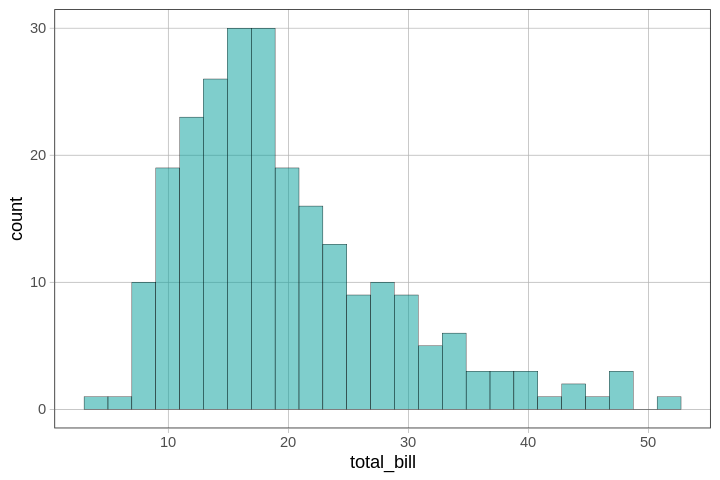

In [21]:
## Run this code but do not edit it
# Create histogram for total bill
gf_histogram(~total_bill, data = dat)

As we suspected from the summary statistics, it appears that most bills are between 13 and 25 dollars, we call this distribution **right skew**, since there's a tail on the right side. So, total bills that are more than 30 dollars are relatively unusual compared to most of the other total bills in our dataset.

**Question 3.1 -** Create a histogram to visualize all the `tip_percent` values in the `dat` dataframe.


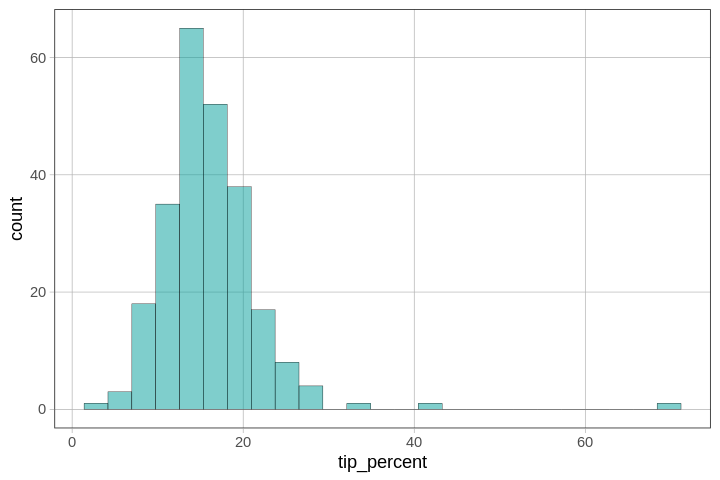

In [22]:
## Sample Response
# Create histogram for tip_percent
gf_histogram(~tip_percent, data = dat)

**Question 3.2 -** Describe the distribution and note any features of interest.

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> We see that tip percents are right skewed, with most tip percents being between 10-20%. However, there are a small number of unusally high tip percents, at 30% or above.
</div>

To visualize categorical variables, we can use the `gf_bar` command to make bar plots. Here we create a bar plot for day:

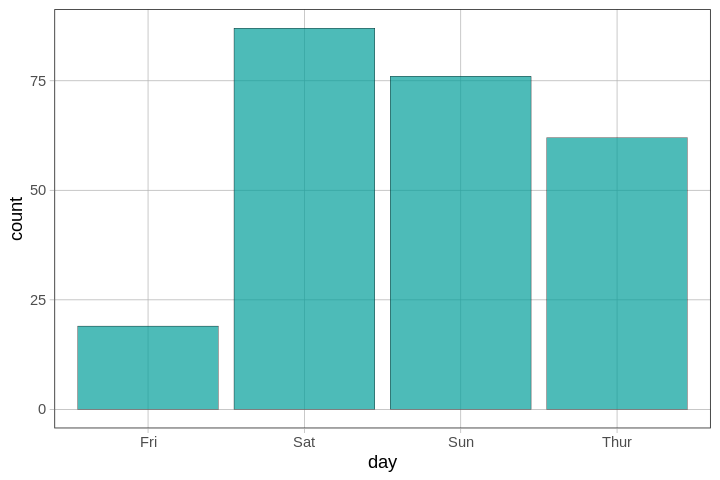

In [23]:
## Run this code but do not edit it
# Create bar plot for day
gf_bar(~day, data = dat)

As shown here, most of the days in our dataset are Saturday. A much fewer number of days (less than 25) are Friday.

**Note:** The bins in histograms are right next to one another, whereas the bins in barplots are separated by a bit of space. This is because the data in histograms are quantative. For example, a tip 11% is just above a tip of 12%, so these values should appear right next to one another (if binned separately). Meanwhile, the data in bar plots is categorical.

**Question 3.3 -** Create a bar plot to visualize the `time` values from the `dat` dataframe.

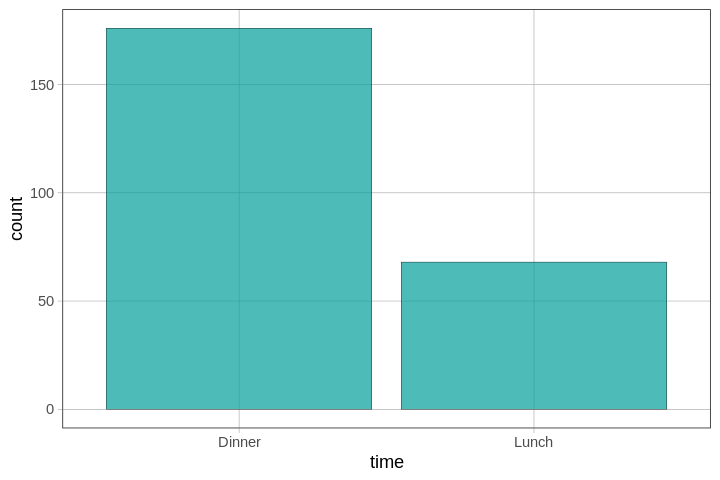

In [24]:
## Sample Response
# Create bar plot for ownership
gf_bar(~time, data = dat)

**Question 3.4 -** Describe the distribution and note any features of interest.

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> The most common type of meal in our dataset is dinner, followed by lunch.
</div>

Sometimes, we may want to explore the relationship between two variables by visualizing them both at once. When we want to visualize the relationship between a categorical variable and quantitative variable, we can use boxplots. Here, we show how to use `gf_boxplot` to visualize the relationship between `time` (categorical) and `total_bill` (quantitative).

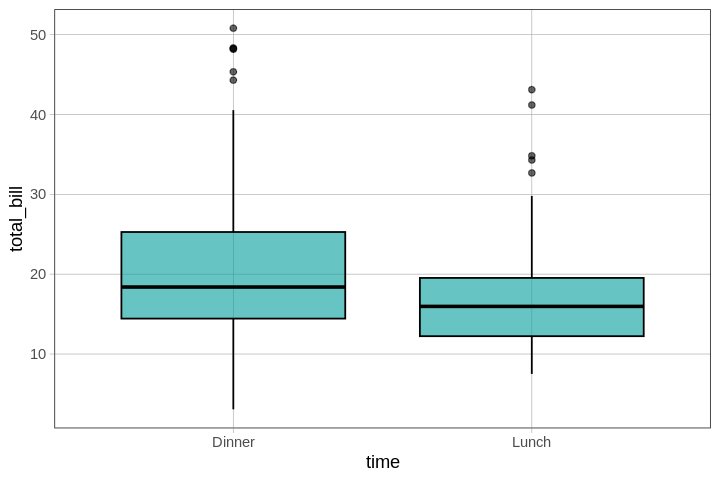

In [25]:
## Run this code but do not edit it
# Create boxplots for admit_rates of institutions with different highest_degree values
gf_boxplot(total_bill ~ time, data = dat)

<div class="alert alert-block alert-info"><b>Instructor Note:</b> By convention, in R's boxplots, outliers are visualized as dots. The edges of the box represent the first and third quartiles, and the line within the box represents the median. If students are unfamiliar with boxplots, we recommend <a href = "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot">this video</a> from Khan Academy (quick refresher) or <a href = "https://skewthescript.org/1-5">this lesson</a> from Skew The Script (detailed lesson with real-world context).
</div>

In this case, we're using `time` as the **predictor variable** and `total_bill` as the **outcome variable**. In other words, we can use the time (dinner or luch) to help predict its total bill. That's because certain meals my cost more than others. So, knowing the type of meal can help us better predict the total bill. 

**Note:** This predictor-outcome relationship is coded in R through the syntax `outcome ~ predictor`, as in `gf_boxplot(total_bill ~ time,...)`.

We see that total bills tend to be lower (lower medians) for lunch than for dinner. At many resteraunts there are lunch specials that tend to be cheaper than dinner options. Also, people may not eat as much during lunch as they would for dinner.

**Question 3.5 -** Create boxplots to visualize the relationship between `time` and `tip_percent` from the `dat` dataframe.

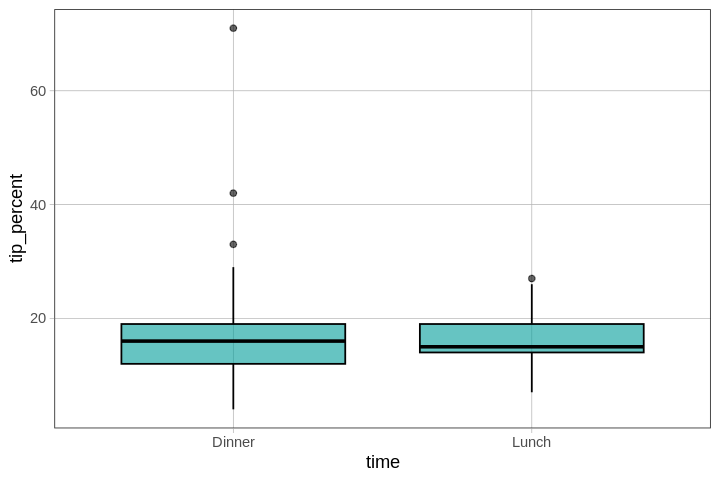

In [26]:
## Sample Response
# Create boxplots for tip_percent of meals (dinner and lunch)
gf_boxplot(tip_percent ~ time, data = dat)

**Question 3.6 -** Create boxplots to visualize the relationship between `day` and `tip_percent` from the `dat` dataframe.


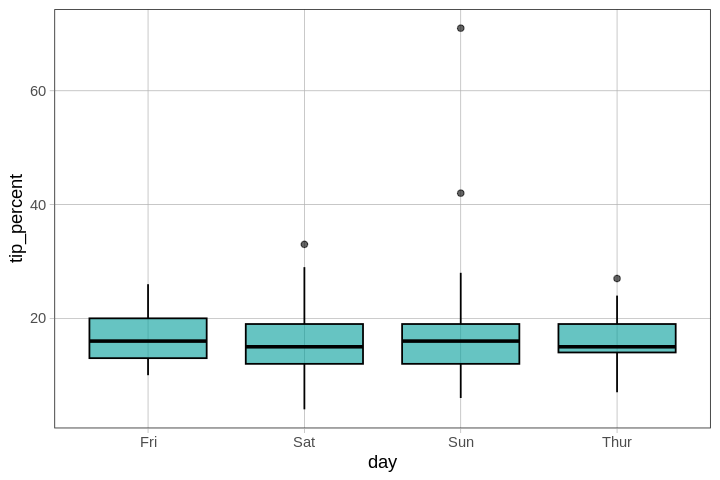

In [27]:
## Sample Response
# Create boxplots for tip_percent of meals (Friday, Saturday, Sunday)
gf_boxplot(tip_percent ~ day, data = dat)

**Question 3.6 -** Using your boxplot visualizations from **Question 3.4** and **Question 3.5**, describe the relationship between day and time, and tip percent.

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> Tip percent does not vary much across the different days (Friday, Saturday, or Sunday) or time (Dinner, Lunch). There seems to be a tendancy to give an unusally large tip during dinner as opposed to lunch. This seems to suggest that there is a standard rate for tipping that most people tend to follow.
</div>

In [28]:
### 4.0 - The Constant Model

We can implement the calculations for the constant model using R. Remember the process:

- Choose a value for $\theta$
- Compute the absolute loss for each observation $|y-\theta|$
- Find the sum of all the loss
- Divide the sum by the number of observations

**Note:** We will do each step on a separate line.

The code cell below implements the mean absolute loss for the tip percent.

In [29]:
## Run this code but do not edit it
# Choose a value for theta, compute the absolute loss, 
# find the sum of all the loss, and
# divide the sum by the number of observations

theta = 10
absolute_loss = dat$tip_percent - theta
sum_loss = sum(absolute_loss)
mean_absolute_loss = sum_loss/length(absolute_loss)

print(paste("The mean absolute loss with theta =", theta, " is ", mean_absolute_loss))

[1] "The mean absolute loss with theta = 10  is  6.09426229508197"


Choose a different value for $\theta$ between 10-20%. Assign your choice for $\theta$ to `theta = `, then run the cell.

In [30]:
## Run this code but do not edit it
# Choose a value for theta, compute the absolute loss, 
# find the sum of all the loss, and
# divide the sum by the number of observations

theta = 10
absolute_loss = dat$tip_percent - theta
sum_loss = sum(absolute_loss)
mean_absolute_loss = sum_loss/length(absolute_loss)

print(paste("The mean absolute loss with theta =", theta, " is ", mean_absolute_loss))

[1] "The mean absolute loss with theta = 10  is  6.09426229508197"


**Question 3.7 -** Was you value for mean absolute loss greater than or less than the $\theta=10$. Explain what it means for the value of `mean_absolute_loss` to be greater for $\theta=10$. What value of $\theta$ do you think will result in the lowest amount for the `mean_absolute_loss`?

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> The best value to choose for predciting mean absolute loss is the median.</div>

Now, let's try setting the value of $\theta$ to the median. Then check the results from our `mean_absolute_loss` process.

In [31]:
## Run this code but do not edit it
# Find the median `tip_percent` column, then calculate the mean absolute loss and the find the median.
mean_tip <- mean(dat$tip_percent)
print(paste("The average tip percent is", mean_tip))

theta = mean_tip
absolute_loss = dat$tip_percent - theta
sum_loss = sum(absolute_loss)
mean_absolute_loss = sum_loss/length(absolute_loss)
print(paste("The mean absolute loss with `theta = median of all the values in the tip_percent` is", mean_absolute_loss))

[1] "The average tip percent is 16.094262295082"
[1] "The mean absolute loss with `theta = median of all the values in the tip_percent` is -1.04834174128539e-15"


If you are not convinced that the value of $\theta=15.5$ results in the smallest mean absolute loss, then try different $\theta$ values and run the code cell below.

In [32]:
## Run this code but do not edit it
# Find the median `tip_percent` column, then calculate the mean absolute loss and the find the median.
theta = 12
absolute_loss = dat$tip_percent - theta
sum_loss = sum(absolute_loss)
mean_absolute_loss = sum_loss/length(absolute_loss)
print(paste("The mean absolute loss with `theta = median` of all the values in the tip_percent` is", mean_absolute_loss))

[1] "The mean absolute loss with `theta = median` of all the values in the tip_percent` is 4.09426229508197"


**Question 3.8 -** Now we will implement the steps fo compute the mean squared loss. Remember the process:

- Choose a value for $\theta$
- Compute the squared loss for each observation $(y-\theta)^2$
- Find the sum of all the loss
- Divide the sum by the number of observations

**Note:** We will do each step on a separate line.

The code cell below implements the mean squared loss for the tip percent.

In [33]:
## Choose a value for theta, compute the squared loss, 
# find the sum of all the loss, and
# divide the sum by the number of observations

theta = 10
squared_loss = (dat$tip_percent - theta)^2
sum_loss = sum(squared_loss)
mean_squared_loss = sum_loss/length(squared_loss)

print(paste("The mean squared loss with theta =", theta, " is ", mean_squared_loss))

[1] "The mean squared loss with theta = 10  is  74.233606557377"


Choose a different value for $\theta$ between 10-20%. Assign your choice for $\theta$ to `theta = `, then run the cell.

In [34]:
## Choose a value for theta, compute the squared loss, 
# find the sum of all the loss, and
# divide the sum by the number of observations

theta = 15
squared_loss = (dat$tip_percent - theta)^2
sum_loss = sum(squared_loss)
mean_squared_loss = sum_loss/length(squared_loss)

print(paste("The mean squared loss with theta =", theta, " is ", mean_squared_loss))

[1] "The mean squared loss with theta = 15  is  38.2909836065574"


**Question 3.9 -** Was you value for mean squared loss greater than or less than the $\theta=10$. Explain what it means for the value of `mean_squared_loss` to be greater for $\theta=10$. What value of $\theta$ do you think will result in the lowest amount for the `mean_squared_loss`?

**Double-click this cell to type your answer here:** 

<div class="alert alert-block alert-info"><b>Sample Response:</b> The best value to choose for predciting mean squared loss is the mean.</div>

Now, let's try setting the value of $\theta$ to the mean. Then check the results from our `mean_squared_loss` process.

In [35]:
## Run this code but do not edit it
# Find the median `tip_percent` column, then calculate the mean absolute loss and the find the median.
mean_tip <- mean(dat$tip_percent)
print(paste("The average tip percent is", mean_tip))

theta = mean_tip
squared_loss = (dat$tip_percent - theta)^2
sum_loss = sum(squared_loss)
mean_squared_loss = sum_loss/length(squared_loss)
print(paste("The mean squared loss with `theta = mean of all the values in the tip_percent` is", mean_squared_loss))

[1] "The average tip percent is 16.094262295082"
[1] "The mean squared loss with `theta = mean of all the values in the tip_percent` is 37.0935736361193"


If you are not convinced that the value of $\theta=16$ results in the smallest mean squared loss, then try different $\theta$ values and run the code cell below.

In [36]:
## Run this code but do not edit it
# Find the median `tip_percent` column, then calculate the mean absolute loss and the find the median.
mean_tip <- mean(dat$tip_percent)
print(paste("The average tip percent is", mean_tip))

theta = 12
squared_loss = (dat$tip_percent - theta)^2
sum_loss = sum(squared_loss)
mean_squared_loss = sum_loss/length(squared_loss)
print(paste("The mean squared loss with `theta = mean of all the values in the tip_percent` is", mean_squared_loss))

[1] "The average tip percent is 16.094262295082"
[1] "The mean squared loss with `theta = mean of all the values in the tip_percent` is 53.8565573770492"


Now that we’ve worked with two loss functions, we can ask ourselves how do we choose between the median or mean? Since these statistics minimize different loss functions, we can equivalently ask: what is the most appropriate loss function for our problem? To answer this question, we look at the context of our problem.

Compared to the mean absolute loss, the mean squared loss gives especially large losses when the tip is much larger (or smaller) than expected. An analyst who wants to understand the typical tip percent would use mean absolute loss and the median (15.5), but an analyst  who despises unexpected large tips might summarize the data using mean squared loss and the mean (16).

We’ve introduced the constant model: a model that summarizes all of the data by a single value. To fit the constant model, we chose a loss function that measured how well a given constant fits a data value, and we computed the average loss over all of the data values. We saw that depending on the choice of loss function, we get a different minimizing value: we found that the mean minimizes the average squared loss, and the median minimizes the average absolute loss. We also discussed how we can incorporate context and knowledge of our problem to pick a loss function.

The idea of fitting models through loss minimization ties simple summary statistics—like the mean, median-to more complex modeling situations. The process we took to model our data apply to many modeling scenarios:

- Select the form of a model (such as the constant model)

- Select a loss function (such as absolute or squared loss)

- Fit the model by minimizing the loss over all the data (such as average loss)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f82fdea-532b-4a4b-9937-108d7206dda5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>